# 2D Incompressible Navier-Stokes Solver
### Solve the Navier-Stokes equations for a lid driven cavity problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
grid = 7
u = np.zeros((grid,grid+1), dtype=np.float64); un = np.zeros((grid,grid+1), dtype=np.float64); uc = np.zeros((grid,grid), dtype=np.float64)
v = np.zeros((grid+1,grid), dtype=np.float64); vn = np.zeros((grid+1,grid), dtype=np.float64); vc = np.zeros((grid,grid), dtype=np.float64)
p = np.ones((grid+1,grid+1), dtype=np.float64); pn = np.zeros((grid+1,grid+1), dtype=np.float64); pc = np.zeros((grid,grid), dtype=np.float64)
m = np.zeros((grid+1,grid+1), dtype=np.float64)
step =1
dx = 1.0/(grid-1)
dy = 1.0/(grid-1)
dt = 0.001
delta = 4.5
error = 1.0
Re = 100.0
u[:,grid-1:grid] = 1 # make top colunms 1.0

In [5]:

while error > 0.01:
  # solve u-momentum
  for i in range(1,grid-1):
    for j in range(1,grid):
      a = u[i+1][j]*u[i+1][j]-u[i-1][j]*u[i-1][j]
      b = (u[i][j]+u[i][j+1])*(v[i][j]+v[i+1][j])-(u[i][j]+u[i][j-1])*(v[i+1][j-1]+v[i][j-1])
      c = u[i+1][j]-2.0*u[i][j]+u[i-1][j]
      d = u[i][j+1]-2.0*u[i][j]+u[i][j-1]
      e = p[i+1][j]-p[i][j]
      un[i][j] = u[i][j] - dt*(  (a)/2.0/dx + 0.25*( b )/dy  ) - dt/dx*(e) + dt*1.0/Re*( (c)/dx/dx +(d)/dy/dy )

  for j in range(1,grid):
    un[0][j] = 0.0
    un[grid-1][j] = 0.0

  for i in range(grid):
    un[i][0] = -un[i][1]
    un[i][grid] = 2 - un[i][grid-1]

  # solve v-momentum
  for i in range(1,grid):
    for j in range(1,grid-1):
      vn[i][j] = v[i][j] - dt* ( 0.25*( (u[i][j]+u[i][j+1])*(v[i][j]+v[i+1][j])-(u[i-1][j]+u[i-1][j+1])*(v[i][j]+v[i-1][j]) )/dx \
        +(v[i][j+1]*v[i][j+1]-v[i][j-1]*v[i][j-1])/2.0/dy ) \
        - dt/dy*(p[i][j+1]-p[i][j]) \
        + dt*1.0/Re*( (v[i+1][j]-2.0*v[i][j]+v[i-1][j])/dx/dx+(v[i][j+1]-2.0*v[i][j]+v[i][j-1])/dy/dy )

  for j in range(1,grid-1):
    vn[0][j] = -vn[1][j]
    vn[grid][j] = -vn[grid-1][j]

  for i in range(grid+1):
    vn[i][0] = 0.0
    vn[i][grid-1] = 0.0

  # solve continuity equation
  for i in range(1,grid):
    for j in range(1,grid):
      pn[i][j] = p[i][j]-dt*delta*(  ( un[i][j]-un[i-1][j] )/dx + ( vn[i][j]-vn[i][j-1] ) /dy  )

  for i in range(1,grid):
    pn[i][0] = pn[i][1]
    pn[i][grid] = pn[i][grid-1]

  for j in range(grid+1):
    pn[0][j] = pn[1][j]
    pn[grid][j] = pn[grid-1][j]

  # Displaying error
  error = 0.0

  for i in range(1,grid):
    for j in range(1,grid):
      m[i][j] = (  ( un[i][j]-un[i-1][j] )/dx + ( vn[i][j]-vn[i][j-1] )/dy  )
      error = error + abs(m[i][j])

  if step%1000 == 1:
    print(f"Error is {error} for the step {step}");

  # Iterating u
  for i in range(grid):
    for j in range(grid+1):
      u[i][j] = un[i][j]

  # Iterating v
  for i in range(grid+1):
    for j in range(grid):
      v[i][j] = vn[i][j]

  # Iterating p
  for i in range(grid+1):
    for j in range(grid+1):
      p[i][j] = pn[i][j]

  xline = np.linspace(0+dx/2, 1-dx/2, grid)
  x, y = np.meshgrid(xline,xline)
  plt.figure()
  plt.grid('on')
  plt.contourf(x, y, u )
  plt.xlabel('X Dimension', fontsize=20)
  plt.ylabel('Y Dimension', fontsize=20)
  plt.title('Velocity U', fontsize=30)
  plt.show()

  step = step + 1



Error is 11.99568 for the step 1
Error is 19.17694624226323 for the step 1001
Error is 13.29410151254609 for the step 2001
Error is 8.331541914652911 for the step 3001
Error is 5.315000737356698 for the step 4001
Error is 3.885910542114255 for the step 5001
Error is 3.048437784281665 for the step 6001
Error is 3.106406999766283 for the step 7001
Error is 2.9671731314475656 for the step 8001
Error is 2.834467882407361 for the step 9001
Error is 2.3756823784045222 for the step 10001
Error is 1.8149850455507346 for the step 11001
Error is 1.210066194305664 for the step 12001
Error is 0.6677396592951217 for the step 13001
Error is 0.22386737633691417 for the step 14001
Error is 0.1558450342077253 for the step 15001
Error is 0.3602680831386673 for the step 16001
Error is 0.4815381148991521 for the step 17001
Error is 0.5161560688986091 for the step 18001
Error is 0.48455645912518264 for the step 19001
Error is 0.410283172300505 for the step 20001
Error is 0.31354905703048863 for the step 21

In [6]:
for i in range(grid):
  for j in range(grid):
    uc[i][j] = 0.5*(u[i][j]+u[i][j+1])
    vc[i][j] = 0.5*(v[i][j]+v[i+1][j])
    pc[i][j] = 0.25*(p[i][j]+p[i+1][j]+p[i][j+1]+p[i+1][j+1])

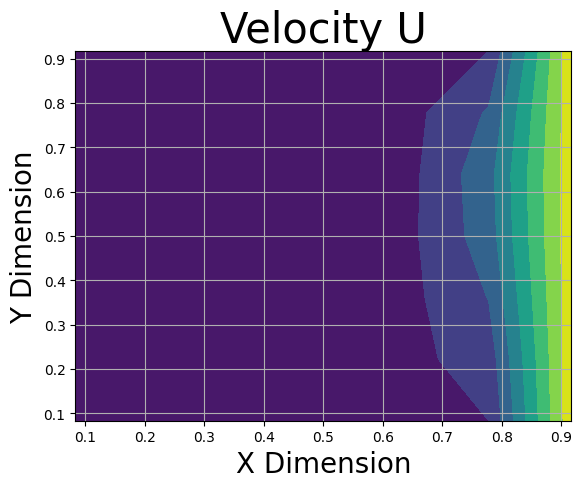

In [7]:
xline = np.linspace(0+dx/2, 1-dx/2, grid)
x, y = np.meshgrid(xline,xline)
plt.figure()
plt.grid('on')
plt.contourf(x, y, uc )
plt.xlabel('X Dimension', fontsize=20)
plt.ylabel('Y Dimension', fontsize=20)
plt.title('Velocity U', fontsize=30)
plt.show()

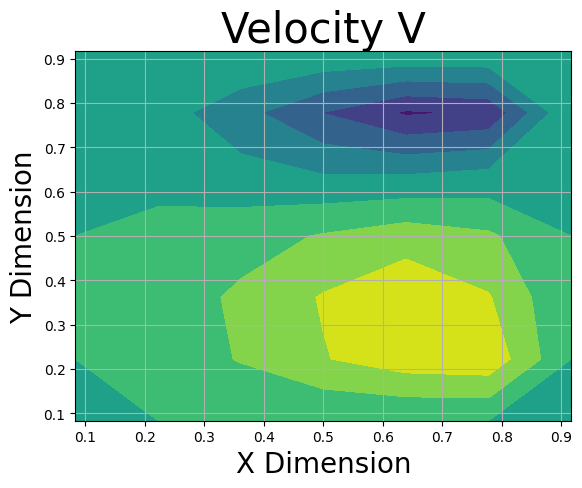

In [8]:
xline = np.linspace(0+dx/2, 1-dx/2, grid)
x, y = np.meshgrid(xline,xline)
plt.figure()
plt.grid('on')
plt.contourf(x, y, vc )
plt.xlabel('X Dimension', fontsize=20)
plt.ylabel('Y Dimension', fontsize=20)
plt.title('Velocity V', fontsize=30)
plt.show()

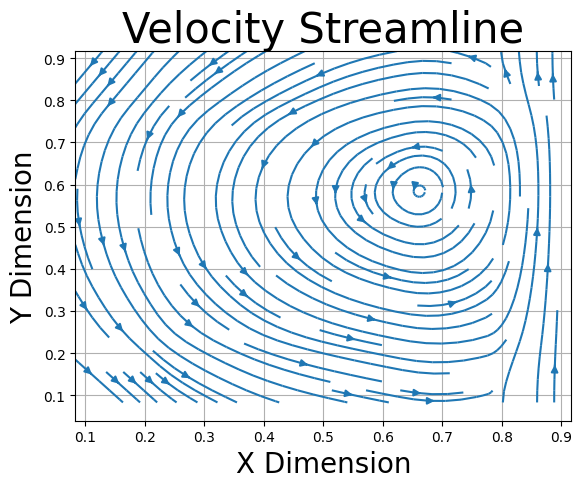

In [9]:
xline = np.linspace(0+dx/2, 1-dx/2, grid)
x, y = np.meshgrid(xline,xline)
plt.figure()
plt.grid('on')
plt.streamplot(x, y, vc, uc)
plt.xlabel('X Dimension', fontsize=20)
plt.ylabel('Y Dimension', fontsize=20)
plt.title('Velocity Streamline', fontsize=30)
plt.show()

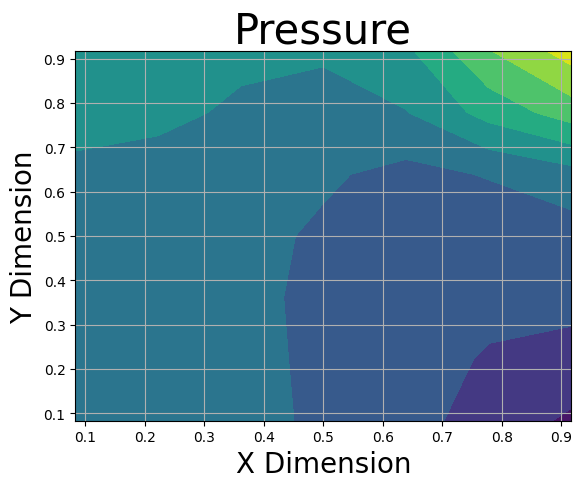

In [10]:
xline = np.linspace(0+dx/2, 1-dx/2, grid)
x, y = np.meshgrid(xline,xline)
plt.figure()
plt.grid('on')
plt.contourf(x, y, pc )
plt.xlabel('X Dimension', fontsize=20)
plt.ylabel('Y Dimension', fontsize=20)
plt.title('Pressure', fontsize=30)
plt.show()